In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

In [2]:
weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W

In [47]:
p=400

#HERE START THE ADAPTIVE GRID
alpha=0.99999
wait_time=int(1/(1-alpha))
n_wait=100
N_grid=wait_time*n_wait
n=N_grid/p
L=T*n

t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

st=int(p/2)
fn=N_grid-1-st

In [ ]:
M=2*dw

move=50

t_t=np.linspace(0, L+wait_time/p, N_grid+wait_time)
k0_t=np.zeros(N_grid+int(1/(1-alpha)), np.dtype(float))


sigma=.01
mu=(2*dw+sigma*move)*(1-alpha)
xi=sigma*np.random.randn(N_grid)+mu


for i in range(N_grid+wait_time):
    if i==0:
        k0_t[i]=2*dw
    else:
        dif=np.random.normal(mu, sigma)
        k0_t[i]=alpha*k0_t[i-1]+dif
        

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.ylim((min(k0_t)-0.05, max(k0_t)))
plt.plot(t_t, k0_t, 'b')
plt.plot(t_t, [2*dw]*(N_grid+wait_time), 'r')
plt.plot(t_t, [(2*dw+sigma*move)]*(N_grid+wait_time), 'k--')
plt.plot((wait_time/p, wait_time/p), (min(k0_t)-0.05, max(k0_t)), 'g-')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

k0=np.zeros(N_grid, np.dtype(float))
k0=k0_t[int(1/(1-alpha)):]
if k0[0]<2*dw:
    k0[0]=mu
    print("ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ")
    
print("STD:", np.std(k0_t), np.sqrt(1/(1-alpha*alpha))*sigma)
print("MEAN:", np.mean(k0), (2*dw+sigma*move))



In [37]:
k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")

print(k0_f(t[2]+h/2), k0_f(t[2*p]-h/2), k0_f(t[N_grid-1]+h))

3.180829044991306 3.5456037931851245 4.180142120018777


In [38]:
f=lambda t, x: 2*dw-k0_f(t)*sin(x)
print(f(1, 0))

2.0


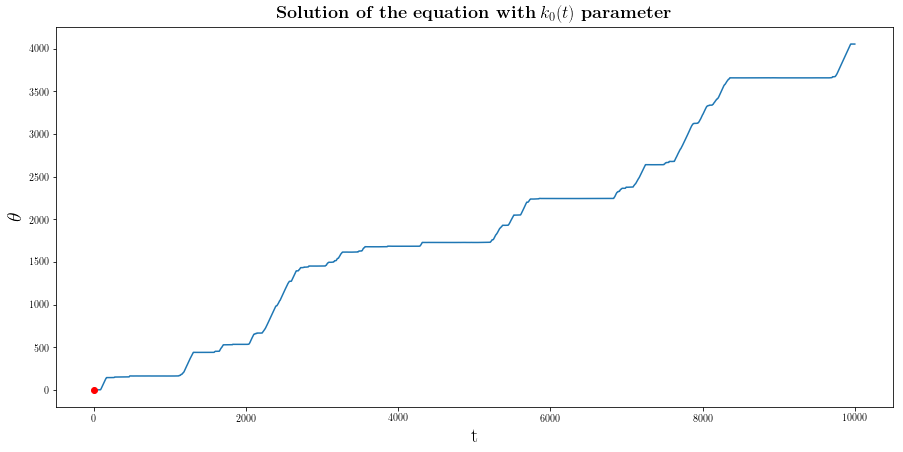

In [39]:
init=np.arcsin(2*dw/k0[0])

theta=[0]*N_grid
for i in range(N_grid):
    if i==0:
        theta[i]=init
    else:
        k1=f(t[i-1], theta[i-1])*h
        k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
        k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
        k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
        theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, theta)
plt.plot(0, init, 'ro')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$\theta $', fontsize=20)
plt.title(r'\textbf{Solution of the equation with} $k_0(t)$ \textbf{parameter}', fontsize=18)
plt.show()

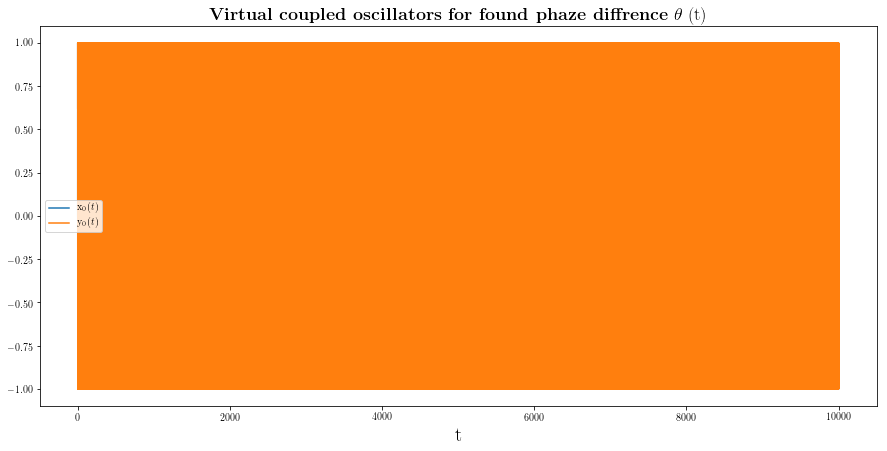

In [40]:
theta=np.array(theta)

x0=np.sin(W*t)
y0=np.sin(W*t+theta)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, x0, label='$x_0(t)$')
plt.plot(t, y0, label='$y_0(t)$')
plt.legend(['x_0(t)', 'y_0(t)'])
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Virtual coupled oscillators for found phaze diffrence} $\theta$ (t)', fontsize=18)
plt.show()

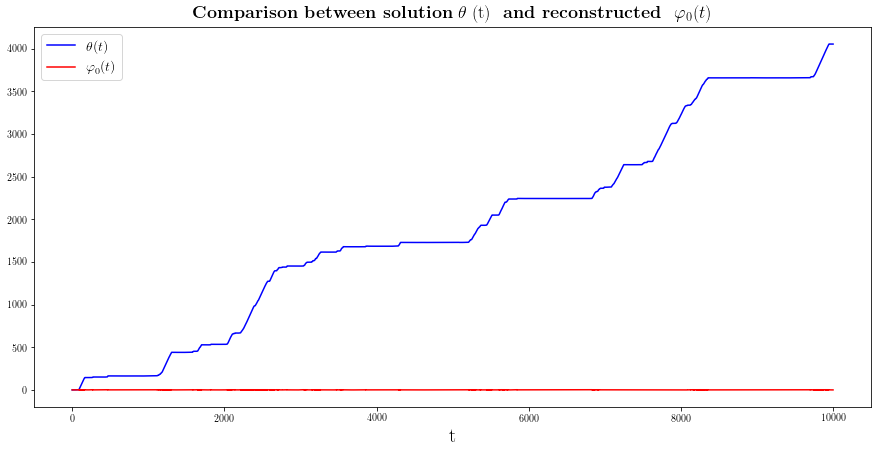

In [41]:
C_0=[0]*N_grid

for i in range(N_grid):
    if (t[i]-T/2>=0) and (t[i]+T/2<=L):
        C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
phi0=np.arccos(C_0)
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, theta, 'b')
plt.plot(t, phi0, 'r')
plt.legend([r'$\theta(t)$', r'$\varphi_0(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between solution} $\theta$ (t) \textbf{ and reconstructed } $\varphi_0(t)$', fontsize=18)
plt.show()

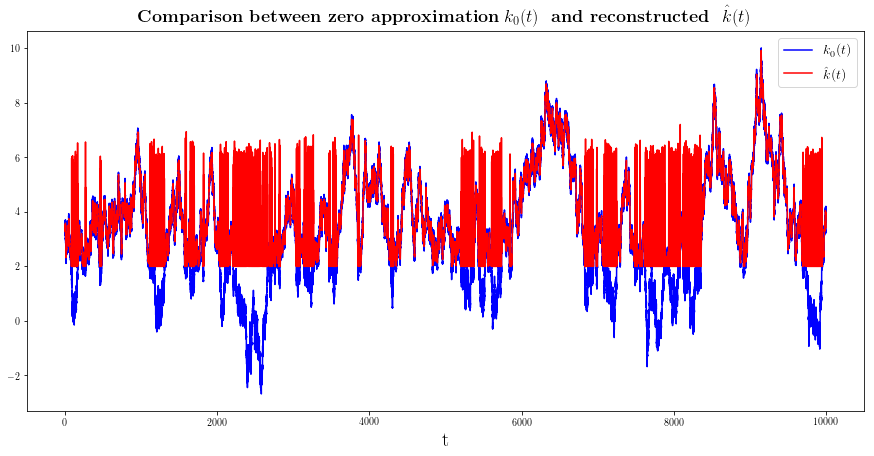

In [42]:
k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

In [43]:
mk=np.array([np.mean(k0[st:fn])]*(fn-st))
sk=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk

0.094599578338058349

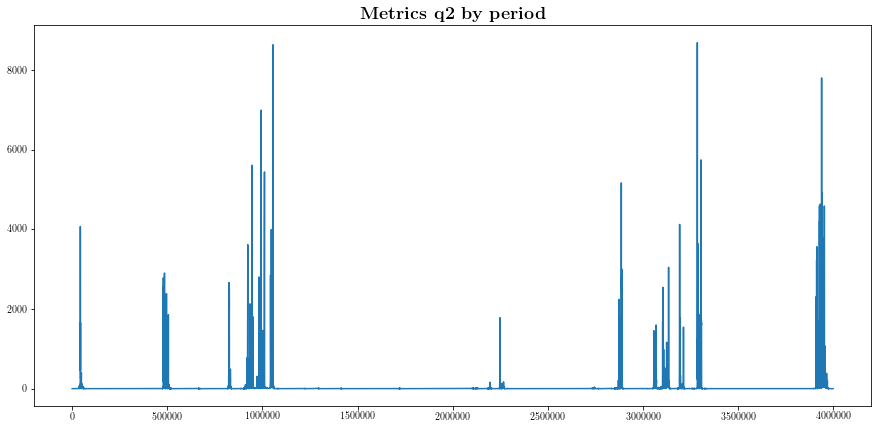

8680.3212978192641

In [44]:
q_t_ar=[]

for i in range(fn-p-st):
    mk=np.array([np.mean(k0[st+i:st+i+p-1])]*p)
    sk=(sum(np.multiply(k0[st+i:st+i+p-1], k0[st+i:st+i+p-1])*h))
    q_t_ar.append((sum(np.multiply(k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1], k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1])*h))/sk)
    
qt=max(q_t_ar)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(q_t_ar)
plt.title(r'\textbf{Metrics q2 by period}', fontsize=18)
plt.show()
qt